# Assignment-2 Hackathon
@author: Kai-Ping Wang

# Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import altair

# Importing the dataset

In [2]:
file_URL = 'https://raw.githubusercontent.com/aso-uts/applied_ds/master/assignment2/repurchase_training.csv'
df = pd.read_csv(file_URL)

# Exploring the dataset

In [3]:
df.head()

,ID,Target,age_band,gender,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
0,1,0,3. 35 to 44,Male,model_1,LCV,9,2,10,3,7,5,6,9,8,10,4
1,2,0,NaN,NaN,model_2,Small/Medium,6,10,3,10,4,9,10,6,10,7,10
2,3,0,NaN,Male,model_3,Large/SUV,9,10,9,10,9,10,10,7,10,6,10
3,5,0,NaN,NaN,model_3,Large/SUV,5,8,5,8,4,5,6,4,10,9,7
4,6,0,NaN,Female,model_2,Small/Medium,8,9,4,10,7,9,8,5,4,4,9


In [4]:
df.describe()

,ID,Target,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased
count,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000,131337.000000
mean,77097.384180,0.026809,5.493022,5.452500,5.472517,5.452287,5.497050,5.481692,5.454967,5.469807,5.502836,5.485438,5.480778
std,44501.636704,0.161525,2.843299,2.884328,2.870665,2.886528,2.878699,2.880408,2.875961,2.859756,2.854896,2.876772,2.867524
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,38563.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,77132.000000,0.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
75%,115668.000000,0.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
max,154139.000000,1.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


Checking the TARGET value count, we notice that the dataset is imbalanced. This affects the metric we will be using to measure the performance of classifier.

In [5]:
df.Target.value_counts()

0    127816
1      3521
Name: Target, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131337 entries, 0 to 131336
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   ID                         131337 non-null  int64 
 1   Target                     131337 non-null  int64 
 2   age_band                   18962 non-null   object
 3   gender                     62029 non-null   object
 4   car_model                  131337 non-null  object
 5   car_segment                131337 non-null  object
 6   age_of_vehicle_years       131337 non-null  int64 
 7   sched_serv_warr            131337 non-null  int64 
 8   non_sched_serv_warr        131337 non-null  int64 
 9   sched_serv_paid            131337 non-null  int64 
 10  non_sched_serv_paid        131337 non-null  int64 
 11  total_paid_services        131337 non-null  int64 
 12  total_services             131337 non-null  int64 
 13  mth_since_last_serv        131337 non-null  

In [7]:
df.age_band.value_counts()

4. 45 to 54    4058
3. 35 to 44    3833
2. 25 to 34    3548
5. 55 to 64    3397
6. 65 to 74    2140
7. 75+         1019
1. <25          967
Name: age_band, dtype: int64

In [8]:
df.gender.value_counts()

Male      36072
Female    25957
Name: gender, dtype: int64

In [9]:
df.car_model.value_counts()

model_2     34491
model_5     24674
model_3     17074
model_1     15331
model_4     15155
model_7      8167
model_8      6443
model_10     3215
model_6      3071
model_9       994
model_13      714
model_12      614
model_11      612
model_15      334
model_17      153
model_16      114
model_18      101
model_14       78
model_19        2
Name: car_model, dtype: int64

In [10]:
df.car_segment.value_counts()

Small/Medium    54553
Large/SUV       52120
LCV             24606
Other              58
Name: car_segment, dtype: int64

# Data Preparation

## Convert categorical data into labels

In [11]:
from sklearn import preprocessing
car_lb = preprocessing.LabelEncoder()
df.car_model = car_lb.fit_transform(df.car_model)
car_seg = preprocessing.LabelEncoder()
df.car_segment = car_seg.fit_transform(df.car_segment)

## Handle missing data
Use 'OTHER' for missing data because the percentage of missing data is too much, so separating from existing value to avoid training being contaminated.

In [12]:
gender_lb = preprocessing.LabelEncoder()
df.gender.fillna('OTHER')
df.gender = gender_lb.fit_transform(df.gender.fillna('OTHER'))
df.gender.value_counts()

2    69308
1    36072
0    25957
Name: gender, dtype: int64

In [13]:
age_lb = preprocessing.LabelEncoder()
df.age_band.fillna('OTHER')
df.age_band = age_lb.fit_transform(df.age_band.fillna('OTHER'))
df.age_band.value_counts()

7    112375
3      4058
2      3833
1      3548
4      3397
5      2140
6      1019
0       967
Name: age_band, dtype: int64

In [14]:
X = df.iloc[:, 2:].values
X

array([[ 2,  1,  0, ...,  8, 10,  4],
       [ 7,  2, 11, ..., 10,  7, 10],
       [ 7,  1, 12, ..., 10,  6, 10],
       ...,
       [ 7,  2, 14, ...,  7, 10, 10],
       [ 7,  2, 14, ...,  6,  7, 10],
       [ 7,  2,  0, ...,  4,  9, 10]])

In [15]:
y = df.iloc[:, 1].values
y

array([0, 0, 0, ..., 1, 1, 1])

# Split training set and testing set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
df_features = df.drop(columns=['ID','Target'])

# Modeling

## Create a get_score method to be reused easily, and it does the following
- Train the model using training set
- Print out F1 and MCC score
- Print out feature importance if possible
- Print out confusion metrix

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

def get_score(model):
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  y_pred = model.predict(X_test)
  print("F1 score for training is %.4f" % f1_score(y_train, y_pred_train))
  print("MCC score for training is %.4f" % matthews_corrcoef(y_train, y_pred_train))
  print("F1 score is %.4f" % f1_score(y_test, y_pred))
  print("MCC score is %.4f" % matthews_corrcoef(y_test, y_pred))

  # If it's random forest classifier, print out feature importances
  if isinstance(model, RandomForestClassifier):
    # check Important features
    feature_importances_df = pd.DataFrame(
        {"feature": df_features.columns, "importance": model.feature_importances_}
    ).sort_values("importance", ascending=False)

    # Display
    print(feature_importances_df)
  
  print("=== Confusion Metrix ===")
  print(confusion_matrix(y_test, y_pred))
  plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

## KNeighborsClassifier

F1 score for training is 0.7614
MCC score for training is 0.7726
F1 score is 0.6920
MCC score is 0.7121
=== Confusion Metrix ===
[[25561    24]
 [  309   374]]


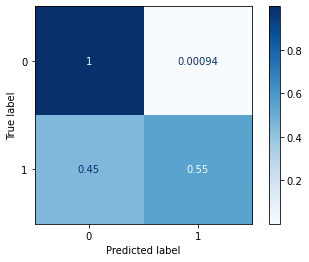

In [18]:
from sklearn.neighbors import KNeighborsClassifier
get_score(KNeighborsClassifier())

## LogisticRegression

F1 score for training is 0.3389
MCC score for training is 0.4120
F1 score is 0.3392
MCC score is 0.4217
=== Confusion Metrix ===
[[25563    22]
 [  539   144]]


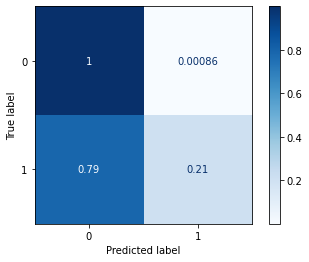

In [19]:
from sklearn.linear_model import LogisticRegression
get_score(LogisticRegression(random_state = 0))

## RandomForestClassifier

F1 score for training is 0.9998
MCC score for training is 0.9998
F1 score is 0.8779
MCC score is 0.8801
                      feature  importance
11        mth_since_last_serv    0.163010
12         annualised_mileage    0.128741
14  num_serv_dealer_purchased    0.123543
4        age_of_vehicle_years    0.093930
10             total_services    0.079255
5             sched_serv_warr    0.065636
13        num_dealers_visited    0.065590
7             sched_serv_paid    0.056287
9         total_paid_services    0.051628
6         non_sched_serv_warr    0.050943
8         non_sched_serv_paid    0.040120
1                      gender    0.035282
2                   car_model    0.028399
3                 car_segment    0.012151
0                    age_band    0.005485
=== Confusion Metrix ===
[[25574    11]
 [  140   543]]


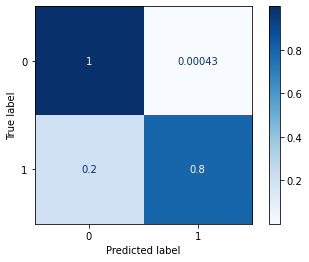

In [20]:
from sklearn.ensemble import RandomForestClassifier
get_score(RandomForestClassifier(random_state = 0))

F1 score for training is 0.9998
MCC score for training is 0.9998
F1 score is 0.8803
MCC score is 0.8825
                      feature  importance
11        mth_since_last_serv    0.157345
12         annualised_mileage    0.116317
5             sched_serv_warr    0.104871
14  num_serv_dealer_purchased    0.098046
10             total_services    0.097134
4        age_of_vehicle_years    0.093216
7             sched_serv_paid    0.086429
13        num_dealers_visited    0.057534
6         non_sched_serv_warr    0.044927
9         total_paid_services    0.042318
8         non_sched_serv_paid    0.032972
1                      gender    0.030138
2                   car_model    0.023731
3                 car_segment    0.010757
0                    age_band    0.004265
=== Confusion Metrix ===
[[25576     9]
 [  139   544]]


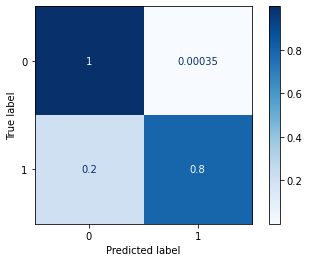

In [21]:
get_score(RandomForestClassifier(random_state = 8, criterion = 'entropy'))

F1 score for training is 0.9998
MCC score for training is 0.9998
F1 score is 0.8842
MCC score is 0.8859
                      feature  importance
11        mth_since_last_serv    0.152258
12         annualised_mileage    0.113595
5             sched_serv_warr    0.104546
14  num_serv_dealer_purchased    0.097087
10             total_services    0.096106
4        age_of_vehicle_years    0.095269
7             sched_serv_paid    0.087265
13        num_dealers_visited    0.060348
6         non_sched_serv_warr    0.048496
9         total_paid_services    0.042247
8         non_sched_serv_paid    0.032380
1                      gender    0.030568
2                   car_model    0.024204
3                 car_segment    0.010912
0                    age_band    0.004718
=== Confusion Metrix ===
[[25574    11]
 [  133   550]]


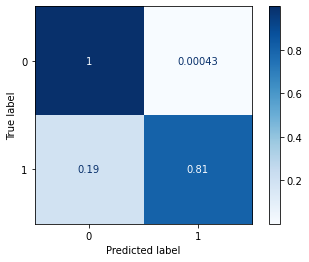

In [22]:
get_score(RandomForestClassifier(random_state = 3, criterion = 'entropy'))

F1 score for training is 0.9998
MCC score for training is 0.9998
F1 score is 0.8837
MCC score is 0.8852
                      feature  importance
11        mth_since_last_serv    0.157974
12         annualised_mileage    0.123434
14  num_serv_dealer_purchased    0.119170
4        age_of_vehicle_years    0.098760
10             total_services    0.084424
13        num_dealers_visited    0.065337
5             sched_serv_warr    0.060101
7             sched_serv_paid    0.058910
9         total_paid_services    0.054898
6         non_sched_serv_warr    0.054252
8         non_sched_serv_paid    0.038116
1                      gender    0.036370
2                   car_model    0.029323
3                 car_segment    0.012816
0                    age_band    0.006114
=== Confusion Metrix ===
[[25572    13]
 [  132   551]]


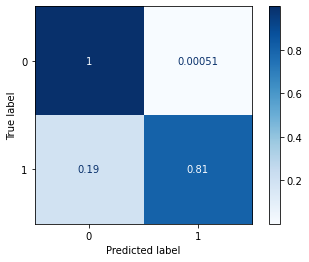

In [23]:
get_score(RandomForestClassifier(random_state = 3))

F1 score for training is 0.9998
MCC score for training is 0.9998
F1 score is 0.8839
MCC score is 0.8859
                      feature  importance
11        mth_since_last_serv    0.157760
12         annualised_mileage    0.115357
5             sched_serv_warr    0.103725
14  num_serv_dealer_purchased    0.097626
10             total_services    0.097292
4        age_of_vehicle_years    0.093527
7             sched_serv_paid    0.084559
13        num_dealers_visited    0.057600
6         non_sched_serv_warr    0.046845
9         total_paid_services    0.043518
8         non_sched_serv_paid    0.033066
1                      gender    0.030486
2                   car_model    0.023745
3                 car_segment    0.010546
0                    age_band    0.004348
=== Confusion Metrix ===
[[25576     9]
 [  135   548]]


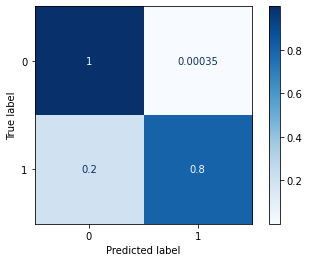

In [24]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy'))

F1 score for training is 0.8258
MCC score for training is 0.8337
F1 score is 0.7827
MCC score is 0.7960
                      feature  importance
11        mth_since_last_serv    0.178273
5             sched_serv_warr    0.131072
12         annualised_mileage    0.120371
10             total_services    0.109427
7             sched_serv_paid    0.098236
4        age_of_vehicle_years    0.090801
14  num_serv_dealer_purchased    0.086409
13        num_dealers_visited    0.046560
9         total_paid_services    0.040776
6         non_sched_serv_warr    0.039704
1                      gender    0.023141
8         non_sched_serv_paid    0.022623
2                   car_model    0.007303
3                 car_segment    0.002946
0                    age_band    0.002358
=== Confusion Metrix ===
[[25579     6]
 [  240   443]]


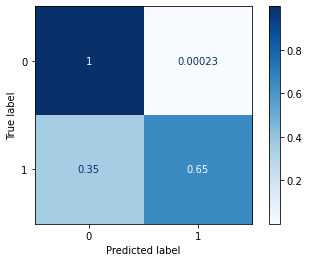

In [25]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=10))

F1 score for training is 0.9502
MCC score for training is 0.9500
F1 score is 0.8716
MCC score is 0.8749
                      feature  importance
11        mth_since_last_serv    0.163547
12         annualised_mileage    0.118074
5             sched_serv_warr    0.104731
10             total_services    0.104489
4        age_of_vehicle_years    0.095836
14  num_serv_dealer_purchased    0.094439
7             sched_serv_paid    0.091419
13        num_dealers_visited    0.053802
9         total_paid_services    0.043434
6         non_sched_serv_warr    0.042783
1                      gender    0.029799
8         non_sched_serv_paid    0.029106
2                   car_model    0.017256
3                 car_segment    0.007478
0                    age_band    0.003804
=== Confusion Metrix ===
[[25578     7]
 [  150   533]]


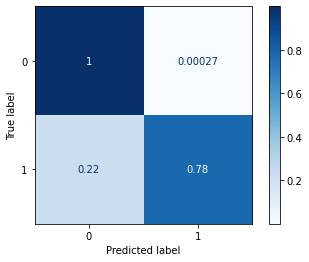

In [26]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=15))

F1 score for training is 0.9233
MCC score for training is 0.9239
F1 score is 0.8586
MCC score is 0.8629
                      feature  importance
11        mth_since_last_serv    0.167301
12         annualised_mileage    0.118547
10             total_services    0.110344
5             sched_serv_warr    0.108887
4        age_of_vehicle_years    0.095196
7             sched_serv_paid    0.093421
14  num_serv_dealer_purchased    0.093393
13        num_dealers_visited    0.050706
6         non_sched_serv_warr    0.042483
9         total_paid_services    0.041119
8         non_sched_serv_paid    0.027578
1                      gender    0.027170
2                   car_model    0.014240
3                 car_segment    0.005930
0                    age_band    0.003684
=== Confusion Metrix ===
[[25578     7]
 [  164   519]]


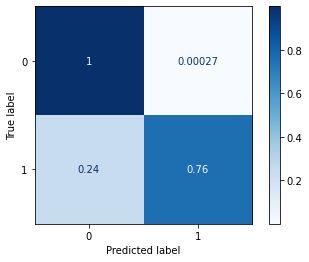

In [27]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=13))

F1 score for training is 0.8748
MCC score for training is 0.8772
F1 score is 0.8467
MCC score is 0.8517
                      feature  importance
11        mth_since_last_serv    0.167563
5             sched_serv_warr    0.122501
12         annualised_mileage    0.117310
10             total_services    0.106073
4        age_of_vehicle_years    0.096858
14  num_serv_dealer_purchased    0.094212
7             sched_serv_paid    0.091895
13        num_dealers_visited    0.049941
9         total_paid_services    0.042831
6         non_sched_serv_warr    0.039714
1                      gender    0.027532
8         non_sched_serv_paid    0.025480
2                   car_model    0.011599
3                 car_segment    0.004494
0                    age_band    0.001997
=== Confusion Metrix ===
[[25576     9]
 [  175   508]]


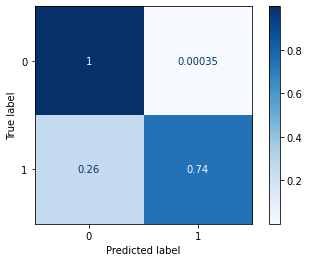

In [28]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=13, min_samples_leaf=5))

F1 score for training is 0.8427
MCC score for training is 0.8474
F1 score is 0.8181
MCC score is 0.8261
                      feature  importance
11        mth_since_last_serv    0.172424
12         annualised_mileage    0.116579
5             sched_serv_warr    0.116034
10             total_services    0.107989
7             sched_serv_paid    0.100473
4        age_of_vehicle_years    0.093551
14  num_serv_dealer_purchased    0.091339
13        num_dealers_visited    0.051425
9         total_paid_services    0.041978
6         non_sched_serv_warr    0.041844
1                      gender    0.027068
8         non_sched_serv_paid    0.023694
2                   car_model    0.009585
3                 car_segment    0.004299
0                    age_band    0.001717
=== Confusion Metrix ===
[[25576     9]
 [  204   479]]


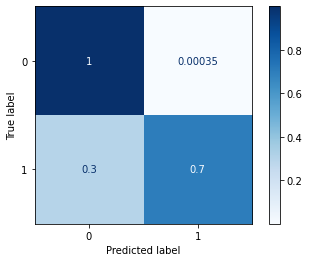

In [29]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=13, min_samples_leaf=10))

F1 score for training is 0.8573
MCC score for training is 0.8613
F1 score is 0.8331
MCC score is 0.8395
                      feature  importance
11        mth_since_last_serv    0.170937
5             sched_serv_warr    0.119359
12         annualised_mileage    0.119042
10             total_services    0.105242
7             sched_serv_paid    0.101164
4        age_of_vehicle_years    0.093691
14  num_serv_dealer_purchased    0.092472
13        num_dealers_visited    0.050222
6         non_sched_serv_warr    0.039595
9         total_paid_services    0.038615
1                      gender    0.026981
8         non_sched_serv_paid    0.026345
2                   car_model    0.010153
3                 car_segment    0.004055
0                    age_band    0.002125
=== Confusion Metrix ===
[[25576     9]
 [  189   494]]


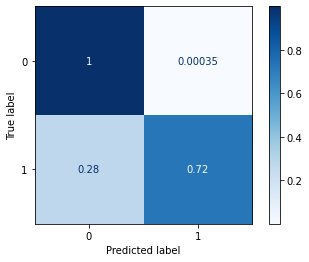

In [30]:
get_score(RandomForestClassifier(n_estimators = 150, random_state = 8, criterion = 'entropy', max_depth=12, min_samples_leaf=5))